# March, 2022 
# Exploratory Data Analysis for the data of all listed companies on Ycombinator


## Table of Contents
<ul> 
    <li><a href="#intro">Project Details</a></li>
    <li><a href="#import">Import libraries</a></li>
    <li><a href="#read_data">Read-In the Data</a></li>
    <li><a href="#assess">Assessing Data</a></li>
    <li><a href="#assess_sum">Assessment Summary</a></li>
    <li><a href="#cleaning">Cleaning Data/Column Engineering</a></li>
    <li><a href="#store_data">Storing Data</a></li>
    <li><a href="#eda">Analyzing, and Visualizing Data</a></li>
    <li><a href='conclusions'>Conclusions</a></li>
</ul>

<a id='intro'></a>
### Project Details

Tasks in this project are as follows:
<ul>
    <li>Data wrangling, which consists of:</li>
        <ul>
          <li>Gathering Data (Already performed in the <b> ycombinator_scraper.ipynb</b> file) </li>
           <li>Assessing data</li>
           <li>Cleaning data</li>
         </ul>
    <li>Storing, analyzing, and visualizing the wrangled data</li>
    <li>Reporting on
    <ol>
          <li> data wrangling efforts and </li>
           <li> data analyses and visualizations</li>
         </ol> 
</ul>

<a id='import'></a>
## Import libraries

In [200]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<a id='read_data'></a>
## Read-In the Data

In [201]:
# read in the dataset
data = pd.read_csv("ycombinator_data.csv")

data.head(3)

,Company_Name,Company_Page_URL,Company_Location,Description_Head,Website,Description,Founded,Team_Size,Linkedin_Profile,Twitter_Profile,Facebook_Profile,Crunchbase_Profile,Active_Founder1,Active_Founder2,Active_Founder3,Active_Founder4,Active_Founder5,Active_Founder6
0,Airbnb,https://www.ycombinator.com/companies/airbnb,"San Francisco, CA, USA",Book accommodations around the world.,http://airbnb.com,Founded in August of 2008 and based in San Fra...,2008.0,5000.0,https://www.linkedin.com/company/airbnb/,https://twitter.com/Airbnb,https://www.facebook.com/airbnb/,https://www.crunchbase.com/organization/airbnb,Nathan Blecharczyk\nNone\nhttps://twitter.com/...,Brian Chesky\nNone\nhttps://twitter.com/bchesky\n,Joe Gebbia\nNone\nhttps://twitter.com/jgebbia\n,NaN,NaN,NaN
1,Coinbase,https://www.ycombinator.com/companies/coinbase,"San Francisco, CA, USA","Buy, sell, and manage cryptocurrencies.",https://www.coinbase.com,"Founded in June of 2012, Coinbase is a digital...",2012.0,500.0,NaN,https://twitter.com/coinbase,https://www.facebook.com/Coinbase/,https://www.crunchbase.com/organization/coinbase,Brian Armstrong\nCEO\nhttps://twitter.com/bria...,NaN,NaN,NaN,NaN,NaN
2,DoorDash,https://www.ycombinator.com/companies/doordash,"San Francisco, CA, USA",Restaurant delivery.,http://doordash.com,"Founded in 2013, DoorDash is a San Francisco-b...",NaN,1600.0,https://www.linkedin.com/company/doordash/,http://twitter.com/doordash,https://www.facebook.com/DoorDash/,https://www.crunchbase.com/organization/doordash,Andy Fang\nFounder\n,Stanley Tang\nFounder\n,Tony Xu\nCEO\n,NaN,NaN,NaN


<a id='assess'></a>
## Assessing Data
Assess the data visually and programmatically for quality and tidiness issues.

In [202]:
# show conscise summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company_Name        1000 non-null   object 
 1   Company_Page_URL    1000 non-null   object 
 2   Company_Location    984 non-null    object 
 3   Description_Head    996 non-null    object 
 4   Website             999 non-null    object 
 5   Description         972 non-null    object 
 6   Founded             824 non-null    float64
 7   Team_Size           987 non-null    float64
 8   Linkedin_Profile    728 non-null    object 
 9   Twitter_Profile     650 non-null    object 
 10  Facebook_Profile    387 non-null    object 
 11  Crunchbase_Profile  643 non-null    object 
 12  Active_Founder1     987 non-null    object 
 13  Active_Founder2     789 non-null    object 
 14  Active_Founder3     242 non-null    object 
 15  Active_Founder4     51 non-null     object 
 16  Active_

Columns with Non-Null Count not equal to 1000 shows the presence of missing values. This represented data that were not included for the company on the website.

No inappropriate datatype

In [203]:
# count the number of unique values in each column of the data
data.nunique()

Company_Name           997
Company_Page_URL      1000
Company_Location       201
Description_Head       996
Website                999
Description            972
Founded                 17
Team_Size              136
Linkedin_Profile       728
Twitter_Profile        650
Facebook_Profile       387
Crunchbase_Profile     643
Active_Founder1        984
Active_Founder2        788
Active_Founder3        242
Active_Founder4         51
Active_Founder5          7
Active_Founder6          1
dtype: int64

In [204]:
# check for the counts of each company's name
data['Company_Name'].value_counts()

Nash          2
Atlas         2
Streak        2
Pardes Bio    1
Aspire        1
             ..
Wevorce       1
TRM Labs      1
Cratejoy      1
Greentoe      1
Proper        1
Name: Company_Name, Length: 997, dtype: int64

It could be seen that **Nash**, **Atlas** and **Streak** appeared twice. this must have been an issue of duplicated listings

In [205]:
# check for duplicate values
data.duplicated().sum()

0

Contrary to what the preceding assessment showed, there is no duplicate entry. Though, no company would have bear the same name, yet, I would close my eye to this issue of duplicate values since it is only in 3 cases

In [206]:
# check for the counts of the founded year
data['Founded'].value_counts()

2021.0    276
2020.0    120
2019.0     60
2015.0     59
2014.0     49
2012.0     44
2017.0     44
2018.0     36
2013.0     36
2016.0     31
2011.0     29
2022.0     26
2009.0      4
2008.0      4
2010.0      2
2007.0      2
2006.0      2
Name: Founded, dtype: int64

MOst companies are founded in the year 2021

In [207]:
data['Team_Size'].value_counts()

2.0      124
3.0       84
4.0       47
5.0       41
11.0      37
        ... 
79.0       1
165.0      1
161.0      1
260.0      1
54.0       1
Name: Team_Size, Length: 136, dtype: int64

No inconsistent value

In [208]:
# show basic statistics of the numeric variables of the data
data.describe()

,Founded,Team_Size
count,824.000000,987.000000
mean,2017.961165,91.204661
std,3.521977,300.987969
min,2006.000000,0.000000
25%,2015.000000,4.000000
50%,2020.000000,12.000000
75%,2021.000000,53.500000
max,2022.000000,5000.000000


<a id='assess_sum'></a>
## Assessment Summary

1. There is a case of duplicated company names (Nash, Atlas and Streak) which appeared twice and have their characteristics to be different which is making me to decide to neglect the issue.
2. Missing data are represented with NaN which would not be handled as they in most cases represented charateristics that are not available for the particular company
3. A new variable showing the `Country_Of_Origin` of the company should be extracted from the Company_Location column
4. Another variable `Number_Of_Founders` should also be extracted from Active_Founder1 through to Active_Founder6

<a id='cleaning'></a>
## Cleaning/Column Engineering

Issues identified in assessment would be treated here

In [209]:
# make copies of individual dataframes to perform the cleaning on
df = data.copy()

> ###### A new variable showing the `Country_Of_Origin` of the company should be extracted from the Company_Location column


In [210]:
# extract the countries
country_list = [str(location).split(",")[-1].strip() for location in df["Company_Location"].values]
# add the new column
df["Country_Of_Origin"] = country_list

In [211]:
# check for inconsistency
df["Country_Of_Origin"].value_counts().sort_index()

Abu Dhabi - United Arab Emirates      1
Algeria                               1
Argentina                             5
Australia                             5
Austria                               1
Bangladesh                            1
Brazil                               12
Canada                               36
Chile                                 6
China                                 1
Colombia                             10
Costa Rica                            1
Denmark                               4
Dubai - United Arab Emirates          4
Egypt                                 2
Estonia                               2
Ethiopia                              1
Finland                               2
France                                8
Georgia                               1
Germany                               8
Ghana                                 1
Hong Kong                             4
Hungary                               1
India                                48


map the following:

 mapper = {"nan": np.NaN, "UAE": "Dubai - United Arab Emirates", "UAE": "Abu Dhabi - United Arab Emirates"}

In [212]:
mapper = {"nan": np.NaN, "Dubai - United Arab Emirates" :"UAE", "Abu Dhabi - United Arab Emirates":"UAE"}
df["Country_Of_Origin"].replace(mapper, inplace=True)

In [213]:
df["Country_Of_Origin"].value_counts().sort_index()

Algeria          1
Argentina        5
Australia        5
Austria          1
Bangladesh       1
Brazil          12
Canada          36
Chile            6
China            1
Colombia        10
Costa Rica       1
Denmark          4
Egypt            2
Estonia          2
Ethiopia         1
Finland          2
France           8
Georgia          1
Germany          8
Ghana            1
Hong Kong        4
Hungary          1
India           48
Indonesia       22
Ireland          1
Israel           4
Kenya            2
Malaysia         3
Mexico          16
Namibia          1
Nepal            1
Netherlands      5
New Zealand      1
Nigeria         25
Norway           2
Pakistan         5
Panama           2
Peru             1
Poland           1
Senegal          2
Singapore       16
South Korea      3
Spain            6
Sudan            1
Sweden           4
Switzerland      3
Taiwan           1
Turkey           1
UAE              5
UK              28
USA            654
Uganda           1
Venezuela   

> ###### variable `Number_Of_Founders` should also be extracted from Active_Founder1 through to Active_Founder6

In [214]:
founder_col = ["Active_Founder1", "Active_Founder2", "Active_Founder3", "Active_Founder4", "Active_Founder5", "Active_Founder6"]
# where Active_Founder1 - Active_Founder6 are not NaN
df["Number_Of_Founder"] = 6 - df[founder_col].isna().sum(axis=1)

In [215]:
founder_col2 = ["Active_Founder1", "Active_Founder2", "Active_Founder3", "Active_Founder4", "Active_Founder5", 
                "Active_Founder6", "Number_Of_Founder"]
df[founder_col2].head(3)

,Active_Founder1,Active_Founder2,Active_Founder3,Active_Founder4,Active_Founder5,Active_Founder6,Number_Of_Founder
0,Nathan Blecharczyk\nNone\nhttps://twitter.com/...,Brian Chesky\nNone\nhttps://twitter.com/bchesky\n,Joe Gebbia\nNone\nhttps://twitter.com/jgebbia\n,NaN,NaN,NaN,3
1,Brian Armstrong\nCEO\nhttps://twitter.com/bria...,NaN,NaN,NaN,NaN,NaN,1
2,Andy Fang\nFounder\n,Stanley Tang\nFounder\n,Tony Xu\nCEO\n,NaN,NaN,NaN,3


<a id='store_data'></a>
## Storing Data
store the prepared data

In [216]:
df.to_csv('prepared_data.csv',index=False)

<a id='eda'></a>
## Analyzing, and Visualizing Data
> ## Univariate Analysis
       1. Analyse and Visualize the most represented country (Country_Of_Origin) on ycombinator
       2. Analyse and Visualizing the distribution of the Year founded of the companies
       3. Analyse and visualize the distribution of the team size of the companies
       4. Analyse and visualize the distribution of the Number_Of_Founder of the companies


> ## Bi-variate Analysis
       5. Analyse and visualize the relationship between Country_Of_Origin, and Year founded.
       6. Analyse and visualize the relationship between Country_Of_Origin, and team size.
       7. Analyse and visualize the relationship between Country_Of_Origin, and Number_Of_Founder.
       8. Analyse the relationship between Number_Of_Founder, and team size.

> ##### Analyse and Visualize the most represented country (Country_Of_Origin) on ycombinator

USA            654
India           48
Canada          36
UK              28
Nigeria         25
Indonesia       22
Singapore       16
Mexico          16
Brazil          12
Colombia        10
France           8
Germany          8
Chile            6
Spain            6
Australia        5
Netherlands      5
Pakistan         5
UAE              5
Argentina        5
Hong Kong        4
Sweden           4
Vietnam          4
Denmark          4
Israel           4
South Korea      3
Switzerland      3
Malaysia         3
Senegal          2
Venezuela        2
Finland          2
Egypt            2
Norway           2
Kenya            2
Estonia          2
Panama           2
Nepal            1
Hungary          1
Georgia          1
New Zealand      1
Ireland          1
China            1
Ethiopia         1
Costa Rica       1
Namibia          1
Sudan            1
Peru             1
Austria          1
Bangladesh       1
Uganda           1
Taiwan           1
Poland           1
Ghana            1
Turkey      

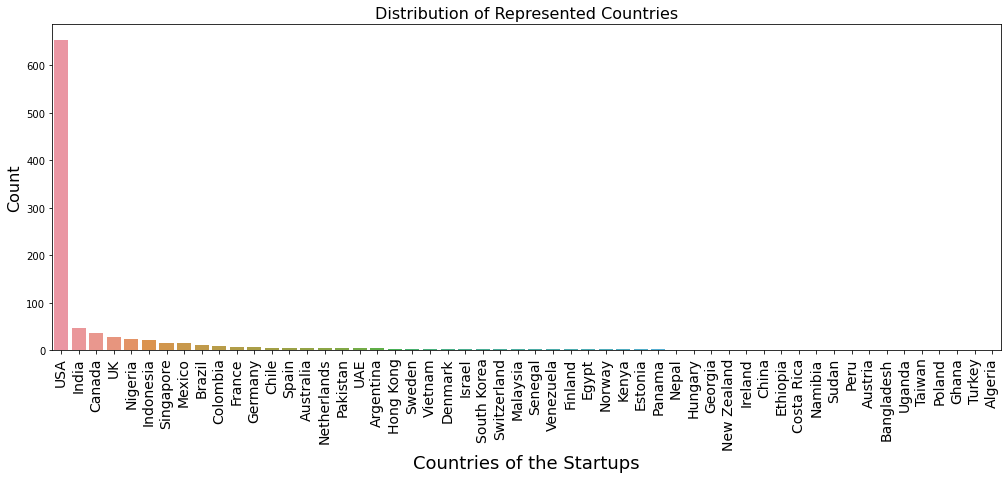

In [217]:
# print the counts of the 10 most represented countries
print(df['Country_Of_Origin'].value_counts())

# set the plot size
plt.figure(figsize = (17,6))

#value_counts already in descending order of value
ax = sns.barplot(x = df['Country_Of_Origin'].value_counts().index, 
                 y =df['Country_Of_Origin'].value_counts().values,
                 data = df);

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 14);
#label x axis
plt.xlabel("Countries of the Startups",fontsize = 18);
plt.ylabel("Count",fontsize = 16);
# title the graph
plt.title("Distribution of Represented Countries",fontsize = 16);

As it could be seen from the analysis and the graph, the most represented country of all is the **USA** which counts 654 of the total 1000 companies. It is followed by India, Canada, UK, Nigeria and Indonesia

> ##### Analyse and Visualizing the distribution of the Year founded of the companies

2021.0    276
2020.0    120
2019.0     60
2015.0     59
2014.0     49
2012.0     44
2017.0     44
2018.0     36
2013.0     36
2016.0     31
2011.0     29
2022.0     26
2009.0      4
2008.0      4
2010.0      2
2007.0      2
2006.0      2
Name: Founded, dtype: int64


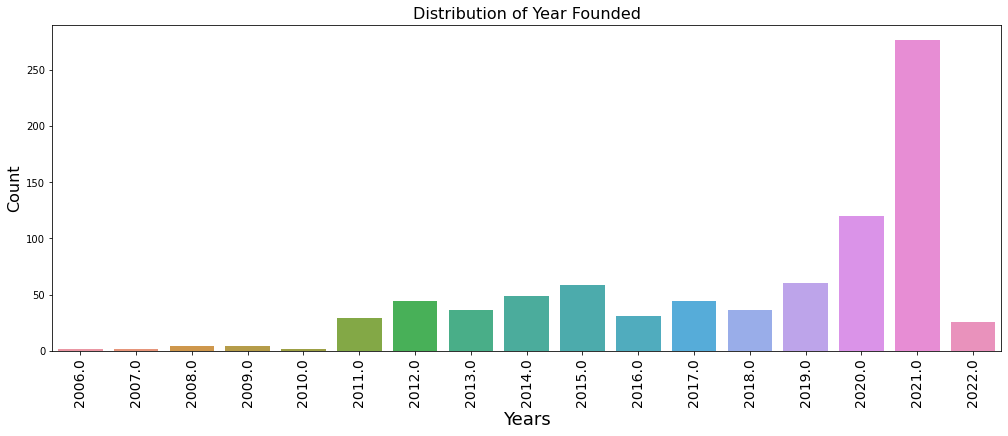

In [218]:
# print the counts of the years
print(df['Founded'].value_counts())


# set the plot size
plt.figure(figsize = (17,6))

#value_counts already in descending order of value
ax = sns.countplot(x=df['Founded'])

ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 14);
#label x axis
plt.xlabel("Years",fontsize = 18)
plt.ylabel("Count",fontsize = 16)
# title the graph
plt.title("Distribution of Year Founded",fontsize = 16);

It could be seen that the more recent a company is founded, the likely it is to be funded/listed by ycombinator

> ##### Analyse and visualize the distribution of the team size of the companies

count     987.000000
mean       91.204661
std       300.987969
min         0.000000
25%         4.000000
50%        12.000000
75%        53.500000
max      5000.000000
Name: Team_Size, dtype: float64


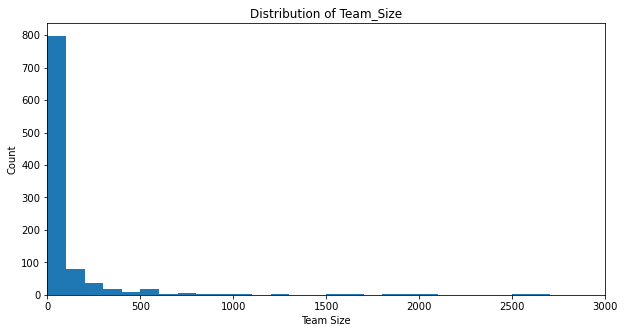

In [219]:
# print the counts of the years
print(df['Team_Size'].describe())

# start with a standard-scaled plot
binsize = 100
bins = np.arange(0, df['Team_Size'].max()+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = df, x = 'Team_Size', bins=bins)
plt.xlim(0, 3000)
plt.xlabel('Team Size')
plt.ylabel('Count')
plt.title('Distribution of Team_Size')
plt.show()

The Team size distribution is highly right-skewed with a really long tail that it was very difficult to view the plot. I had to resolve into binning of size 100 and also set the plot's x_axis limit to 3000.  Most teamsize is between 2-4

> ##### Analyse and visualize the distribution of the Number_Of_Founder of the companies

2    547
1    198
3    191
4     44
0     13
5      6
6      1
Name: Number_Of_Founder, dtype: int64


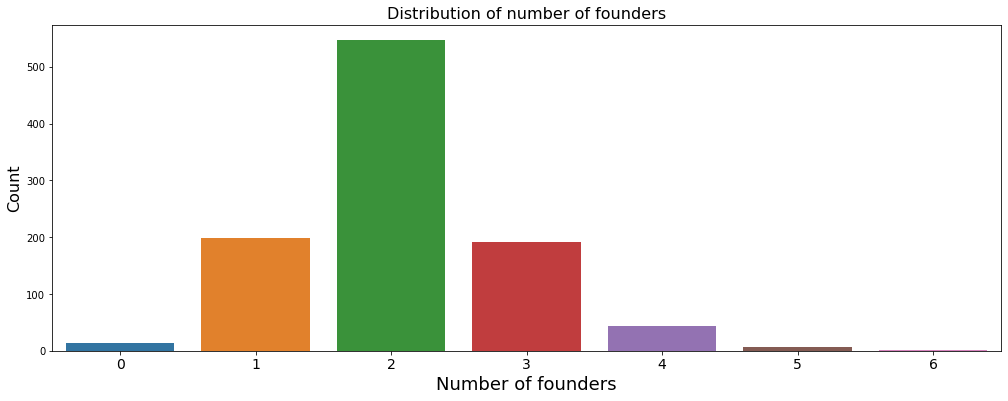

In [220]:
# print the counts of the years
print(df['Number_Of_Founder'].value_counts())


# set the plot size
plt.figure(figsize = (17,6))

#value_counts already in descending order of value
ax = sns.countplot(x=df['Number_Of_Founder']);

ax.set_xticklabels(ax.get_xticklabels(), fontsize = 14);
#label x axis
plt.xlabel("Number of founders",fontsize = 18);
plt.ylabel("Count",fontsize = 16);
# title the graph
plt.title("Distribution of number of founders",fontsize = 16);

Most number of founders is 2 followed by 1 and 3

> ##### Analyse and visualize the relationship between Country_Of_Origin, and Year founded.

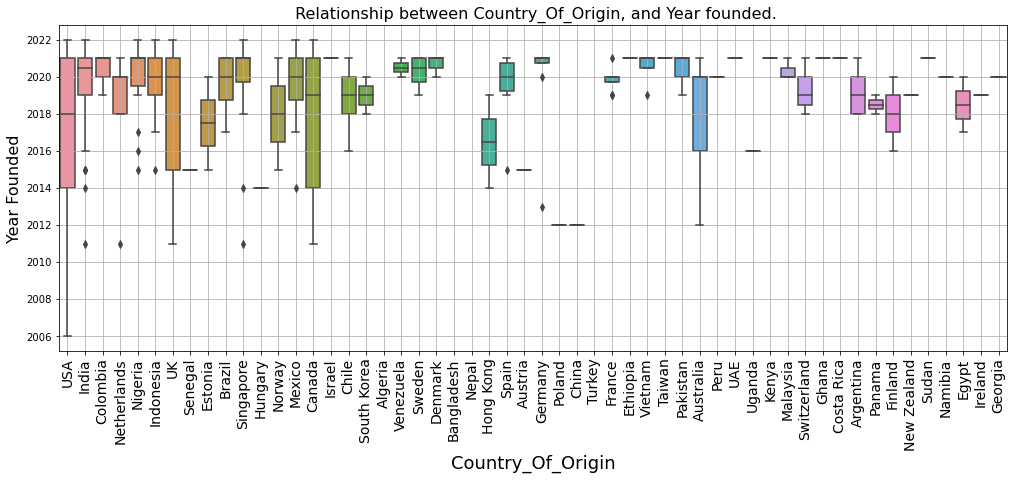

In [221]:
# set the plot size
plt.figure(figsize = (17,6))
ax = sns.boxplot(x="Country_Of_Origin", y = "Founded", data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 14);
#label x axis
plt.xlabel("Country_Of_Origin",fontsize = 18)
plt.ylabel("Year Founded",fontsize = 16)
plt.grid()
# title the graph
plt.title(" Relationship between Country_Of_Origin, and Year founded.", fontsize = 16)
plt.show()

> ##### Analyse and visualize the relationship between Country_Of_Origin, and team size.

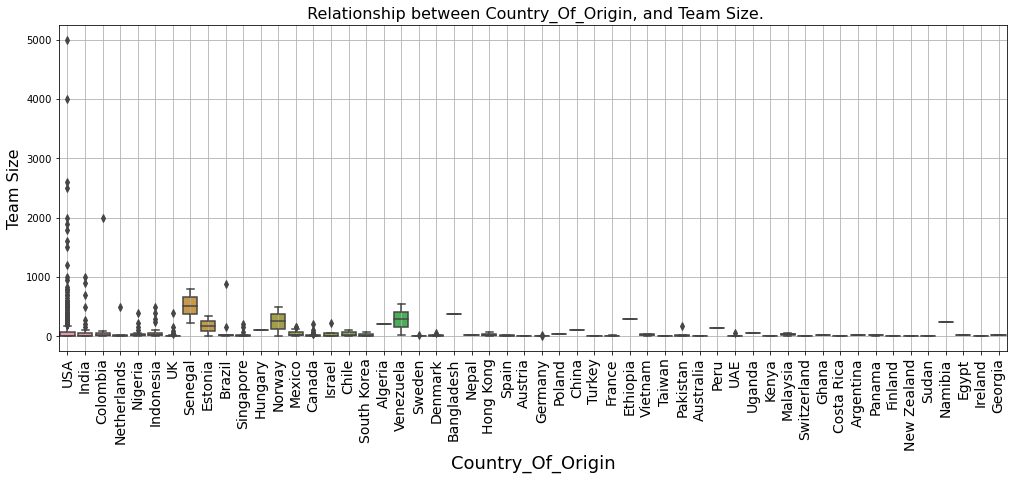

In [222]:
# set the plot size
plt.figure(figsize = (17,6))
ax = sns.boxplot(x="Country_Of_Origin", y = "Team_Size", data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 14);
#label x axis
plt.xlabel("Country_Of_Origin",fontsize = 18)
plt.ylabel("Team Size",fontsize = 16)
plt.grid()
# title the graph
plt.title(" Relationship between Country_Of_Origin, and Team Size.", fontsize = 16)
plt.show()

> ##### Analyse and visualize the relationship between Country_Of_Origin, and Number_Of_Founder.

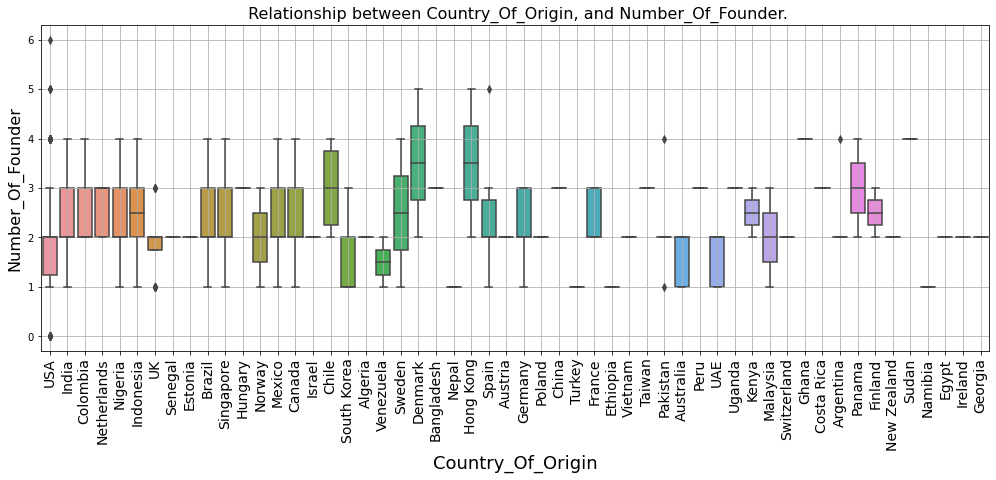

In [223]:
# set the plot size
plt.figure(figsize = (17,6))
ax = sns.boxplot(x="Country_Of_Origin", y = "Number_Of_Founder", data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90, fontsize = 14);
#label x axis
plt.xlabel("Country_Of_Origin",fontsize = 18)
plt.ylabel("Number_Of_Founder",fontsize = 16)
plt.grid()
# title the graph
plt.title(" Relationship between Country_Of_Origin, and Number_Of_Founder.", fontsize = 16)
plt.show()

> ##### Analyse the relationship between Number_Of_Founder, and team size.

In [224]:
df.corr()

,Founded,Team_Size,Number_Of_Founder
Founded,1.000000,-0.337482,0.109966
Team_Size,-0.337482,1.000000,0.039112
Number_Of_Founder,0.109966,0.039112,1.000000


<a id='conclusions'></a>
## Analysis Summary/Conclusions

Using both Univariate and Bivariate analysis:

* The most represented country of all is the USA which counts 654 of the total 1000 companies. It is followed by India, Canada, UK, Nigeria and Indonesia

* It could be seen that the more recent a company is founded, the likely it is to be funded/listed by ycombinator
* The Team size distribution is highly right-skewed with a really long tail that it was very difficult to view the plot. I had to resolve into binning of size 100 and also set the plot's x_axis limit to 3000. Most teamsize is between 2-4

* Most number of founders is 2 followed by 1 and 3
* No interesting relationship between country of origin and team size, number of founder and year founded. Also
* There is a weak, negative linear correlation between Number_Of_Founder and team size.